<a href="https://colab.research.google.com/github/FredyVG15/Entregas-/blob/main/T001/01_M%C3%A9todo_de_Jacobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SOLUCIÓN A LA ECUACIÓN DE LAPLACE IMPLEMENTANDO EL MÉTODO ITERATIVO DE JACOBI **

*Problema  1

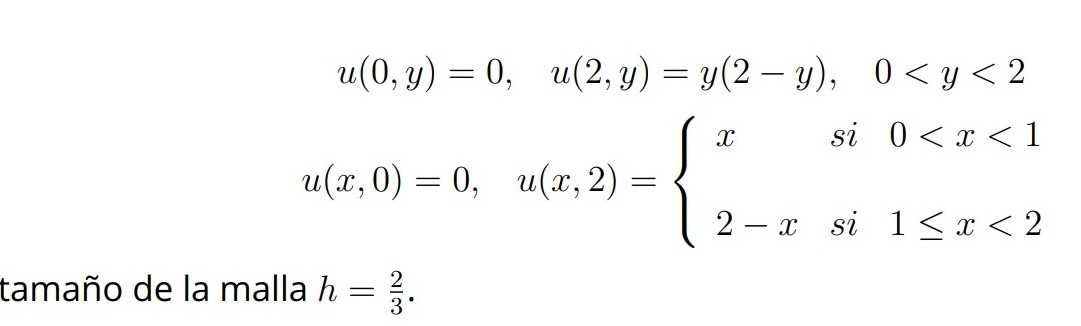

Recordemos que el problema de Dirichlet nos lleva al sitema:

$$4u_{11}-u_{12}-u_{21}=0\\ -u_{11}+4u_{12}-u_{22}=2/3\\ -u_{11}+4u_{21}-u_{22}=8/9\\-u_{12}-u_{21}+4u_{22}=14/9$$

Adicionalmente, es necesario recalcar que el número de ecuaciones será igual al número de puntos interiores.

En forma matricial:
$Ax=b$; donde $$A=\begin{pmatrix}
4 & -1 & -1 & 0 \\
-1 & 4 & 0 & -1 \\
-1 & 0 & 4 & -1 \\
0 & -1 & -1 & 4
\end{pmatrix}$$\\
$$b=\begin{pmatrix}
0 \\ 2/3 \\ 8/9 \\ 14/9 \\
\end{pmatrix}$$




Programa para implementar el método iterativo de Jacobi



Definimos una función que implementará el método. Para ello los parámetros de dicha función serán:



*   A: matriz de coeficientes
*   b: vector de términos independientes
*  VI: vector inicial
*   t: tolerancia para criterio de paro
*   M: Número de iteraciones máximas que se pemite









In [ ]:
 """ Método iterativo de Jacobi """

import numpy as np    # Librería para manejar vectores y matrices
import pandas as pd   # Librería para mostrar resultados en tabla

def jacobi(A, b, VI, t, M):#definimos funcion que implementará el método y sus respectivos parámetros

    """A: matriz de coeficientes
    b: vector de términos independientes
    VI: aproximación inicial
    t: tolerancia para criterio de paro
    M: máximo de iteraciones
    """
    n = len(b)   # Obtiene el número de ecuaciones a partir del vector b.
    x = np.zeros_like(b, dtype=float)  # Inicia el vector x para la nueva aproximación en cada iteración

    # Lista para guardar los resultados de cada iteración
    resultados = []

    k = 1      #Inicia el contador de iteraciones en 1

    while k <= M:  #Ciclo que se repetirá hasta que: Se alcance la tolerancia o se sobrepase el máximo de iteraciones

        ### calcular cada xi
        for i in range(n):                    #recorre cada ecuación i
            suma = 0
            for j in range(n):
                if j != i:                    #asegura que no se use el coeficicnte diagonal
                    suma += A[i][j] * VI[j]
            x[i] = (b[i] - suma) / A[i][i]

        # Obtiene el Error (norma infinito entre la nueva y la anterior)
        error = np.linalg.norm(x - VI, ord=np.inf)

        # Se Guardan los resultados de esta iteración
        resultados.append([k] + list(x) + [error])

        #### verificación de  criterio de paro o tolerancia
        if error < t:
            tabla = pd.DataFrame(resultados, columns=["Iteración"] + [f"x{i+1}" for i in range(n)] + ["Error"])
            print("\n Convergió en", k, "iteraciones.")
            return x, tabla

        ##### Se actualiza para la siguiente iteración
        VI = x.copy()
        k += 1

    # último determinación de convergencia
    tabla = pd.DataFrame(resultados, columns=["Iteración"] + [f"x{i+1}" for i in range(n)] + ["Error"])
    print("\n Número máximo de iteraciones excedido.")
    return None, tabla

# Problema 1: Ejecución, introducimos los valores específicos de la matriz A y el vector b
if __name__ == "__main__":
    A = np.array([[4, -1, -1, 0],
                  [-1, 4, 0, -1],
                  [-1, 0, 4, -1],
                  [0, -1, -1, 4]], dtype=float) #matriz de coeficientes de caso específico

    b = np.array([0, 2/3, 8/9, 14/9], dtype=float)  #definición de vector de términos independientes
    VI = np.zeros_like(b)   # Definición de vector inicial
    t = 1e-6                #Se fija una tolerancia de 10^-6 y un máximo de 100 iteraciones
    M = 100

    sol, tabla = jacobi(A, b, VI, t, M)

    if sol is not None:
        print("\n Solución aproximada:", sol)

    print("\n Tabla de iteraciones:")
    print(tabla)


 Convergió en 19 iteraciones.

 Solución aproximada: [0.1944437  0.36111037 0.41666592 0.58333259]

 Tabla de iteraciones:
    Iteración        x1        x2        x3        x4         Error
0           1  0.000000  0.166667  0.222222  0.388889  3.888889e-01
1           2  0.097222  0.263889  0.319444  0.486111  9.722222e-02
2           3  0.145833  0.312500  0.368056  0.534722  4.861111e-02
3           4  0.170139  0.336806  0.392361  0.559028  2.430556e-02
4           5  0.182292  0.348958  0.404514  0.571181  1.215278e-02
5           6  0.188368  0.355035  0.410590  0.577257  6.076389e-03
6           7  0.191406  0.358073  0.413628  0.580295  3.038194e-03
7           8  0.192925  0.359592  0.415148  0.581814  1.519097e-03
8           9  0.193685  0.360352  0.415907  0.582574  7.595486e-04
9          10  0.194065  0.360731  0.416287  0.582954  3.797743e-04
10         11  0.194255  0.360921  0.416477  0.583143  1.898872e-04
11         12  0.194350  0.361016  0.416572  0.583238  9.494